In [1]:
import os
import pandas as pd
import numpy as np

from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Input
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras import metrics
from keras.optimizers import Adam, SGD

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_pickle('../dataset/SS/clean/withlabel_SPECTER.pkl')
df.head()

,title,abstract,relatedwork_text,main_text,rw_citations,full_citations,SPECTER_embeddings,label
paper_id,,,,,,,,
859921,Summarizing Reviews with Variable-length Synta...,Abstract. We present a novel summarization fra...,We first look at how text excerpts are extract...,Abstract. We present a novel summarization fra...,"[5965756, 1599046, 3177797, 444032, 6884774]","[1599046, 11055565, 16393334, 2481864, 5965756...","[-0.7218136, 0.99761677, -0.27647057, 0.235195...",2
129124,Can Document Selection Help Semi-supervised Le...,Annotating training data for event extraction ...,Self-training has been applied to several natu...,Annotating training data for event extraction ...,"[1398439, 7419156, 11187670, 8336242, 15894892...","[1398439, 7419156, 7579604, 11187670, 8336242,...","[-0.46521527, 0.17172785, 0.27331015, 0.088347...",2
1345235,Optimizing Sparse Matrix–Vector Product Comput...,Large-scale scientific applications frequently...,A variety of different data and computation re...,Large-scale scientific applications frequently...,"[1794629, 9580801, 120335238, 15090599, 208582...","[1794629, 9580801, 120335238, 15090599, 208582...","[-0.16910633, 0.8334114, 0.039647657, -0.09229...",3
2624639,Enhanced Chosen-Ciphertext Security and Applic...,We introduce and study a new notion of enhance...,ECCA is similar in spirit to coin-revealing se...,We introduce and study a new notion of enhance...,"[41204165, 19655, 235427, 226828, 3148885]","[443317, 41204165, 7113862, 10098664, 226828, ...","[0.12169194, 0.04154425, 0.2388953, 0.03814739...",1
146120525,ARSM: Augment-REINFORCE-Swap-Merge Estimator f...,To address the challenge of backpropagating th...,"For optimizing (1) for categorical z, the diff...",To address the challenge of backpropagating th...,"[3535369, 5859948, 1758804, 10756562, 19115634...","[121929631, 4043645, 5859948, 7195970, 1075656...","[-0.8591176, 0.8032798, -0.012844058, 0.021643...",2


In [3]:
Counter(df['label'])

Counter({2: 4160, 3: 4914, 1: 4047, 0: 7807, 4: 6489})

In [4]:
df_cluster = df.loc[df.label == 3]
df_cluster.head()

,title,abstract,relatedwork_text,main_text,rw_citations,full_citations,SPECTER_embeddings,label
paper_id,,,,,,,,
1345235,Optimizing Sparse Matrix–Vector Product Comput...,Large-scale scientific applications frequently...,A variety of different data and computation re...,Large-scale scientific applications frequently...,"[1794629, 9580801, 120335238, 15090599, 208582...","[1794629, 9580801, 120335238, 15090599, 208582...","[-0.16910633, 0.8334114, 0.039647657, -0.09229...",3
153314513,Ghost loads: what is the cost of invisible spe...,Speculative execution is necessary for achievi...,This work was inspired by the Meltdown [24] an...,Speculative execution is necessary for achievi...,"[5748184, 5468472, 15297038, 44064791, 1124774...","[14152545, 49215677, 5886103, 7010052, 2882026...","[0.7643039, 0.13168742, -0.8793892, 0.602123, ...",3
16709187,Code cache management in managed language VMs ...,The compiled native code generated by a just-i...,Code caches are used to store translated and/o...,The compiled native code generated by a just-i...,"[18790527, 13311040, 11401317, 8567730, 149451...","[16089909, 14384573, 9255051, 8167591, 2951672...","[-0.10883464, 0.61096096, -0.3169634, 0.050856...",3
17654474,Fault Localization with Non-parametric Program...,Fault localization is a major activity in soft...,Program slicing [19] is a code-based technique...,Fault localization is a major activity in soft...,"[1358203, 9935785, 13455613, 262092, 14712190,...","[53224498, 15410941, 14712190, 195861096, 3577...","[0.05811803, 0.6135863, -1.6151937, -0.1530414...",3
9577457,On the Content Security Policy Violations due ...,Modern browsers implement different security p...,CSP has been proposed by Stamm et al. [19] as ...,Modern browsers implement different security p...,"[6993258, 6145198, 12334530, 18363315, 1640001...","[13043623, 6993258, 6145198, 12334530, 1836331...","[0.15798981, 0.3182806, -0.034298915, 0.705253...",3


In [5]:
# Multi hot encoding for related works citations
mlb = MultiLabelBinarizer(sparse_output=True)

Y = pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df_cluster['rw_citations']),
                index=df_cluster.index,
                columns=mlb.classes_)
Y.columns = Y.columns.astype(str)

In [6]:
Y.sum().value_counts()[0:20]

1     25276
2      3499
3       957
4       371
5       141
6        77
7        33
8        20
10        5
11        5
9         5
12        4
20        2
15        1
19        1
dtype: int64

In [7]:
Y.sum().value_counts().sum()

30397

In [8]:
#Filter out papers that are not cited at least a few times
Y = Y[Y.columns[Y.sum() > 2]]
Y

,10026408,10030364,10038017,10042781,10042959,10043111,10043351,10072469,10076139,10088651,...,9817415,9825372,9835158,9849883,9885646,989324,99191,9921992,9983849,9989078
paper_id,,,,,,,,,,,,,,,,,,,,,
1345235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153314513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16709187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17654474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9577457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6617213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8842997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35006795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Remove papers with less than 1 cited papers after filter
Y = Y.loc[Y.sum(axis=1) > 1]
Y.shape

(1470, 1622)

In [10]:
X = pd.DataFrame(df_cluster['SPECTER_embeddings'].to_list(), index= df_cluster.index)

#Filter out the same rows for predictive variables as well
X = X[X.index.isin(Y.index)]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
paper_id,,,,,,,,,,,,,,,,,,,,,
153314513,0.764304,0.131687,-0.879389,0.602123,-0.590182,0.888839,1.187040,1.571199,1.262844,-0.837475,...,1.412555,-0.898208,0.659155,-0.142359,-0.430155,0.506748,-0.277294,-0.222558,0.907981,0.676673
17654474,0.058118,0.613586,-1.615194,-0.153041,-0.334235,0.452709,1.205108,1.248547,0.624602,0.109566,...,-0.304711,-0.222364,0.949216,-0.224839,-0.441605,0.787401,0.708315,0.365498,1.174417,0.119576
46519493,0.287645,0.346648,-0.631830,-0.145472,0.279125,-0.744855,1.167919,0.621916,0.760403,-0.216328,...,0.533133,-0.886923,1.527701,-0.232880,0.207915,0.373204,-0.297014,0.263931,1.431764,0.124502
62610046,-0.077167,-0.116171,-0.067197,-0.071420,0.081316,0.127905,0.407578,1.676533,0.726314,-0.127438,...,0.040807,-1.350666,0.482910,0.118598,-0.164545,-0.090487,-0.267620,-0.381268,1.243422,-0.049064
2915566,0.319032,0.159541,-0.465729,0.183361,0.137392,-0.019099,1.046590,0.917923,0.797081,-0.098913,...,0.502199,-1.627239,0.880193,0.346495,0.523629,-0.446247,-0.266265,-0.016213,0.774030,0.103646


In [11]:
print(X.shape)
print(Y.shape)

(1470, 768)
(1470, 1622)


In [12]:
#Create train set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

In [13]:
#Create train set and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=1)

In [14]:
print(X_train.shape)
print(Y_train.shape)

(1124, 768)
(1124, 1622)


# NN Model

In [15]:
batch_size = 256
num_classes = Y_train.shape[1]
epochs = 100

In [16]:
Y_test.shape

(221, 1622)

In [17]:
embedding_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(256, input_dim=embedding_dim, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               196864    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1622)              416854    
Total params: 613,718
Trainable params: 613,718
Non-trainable params: 0
_________________________________________________________________


In [18]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=10)
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[es],
                    validation_data=(X_val, Y_val))

Epoch 1/100
5/5 [==============================] - 0s 43ms/step - loss: 0.0168 - accuracy: 8.8968e-04 - val_loss: 0.0177 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0165 - accuracy: 0.0027 - val_loss: 0.0176 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0164 - accuracy: 0.0027 - val_loss: 0.0176 - val_accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0163 - accuracy: 0.0036 - val_loss: 0.0176 - val_accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0160 - accuracy: 0.0062 - val_loss: 0.0176 - val_accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0158 - accuracy: 0.0027 - val_loss: 0.0176 - val_accuracy: 0.0080
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0155 - accuracy: 0.0044 - val_loss: 0.0175 - val_accuracy: 0.0

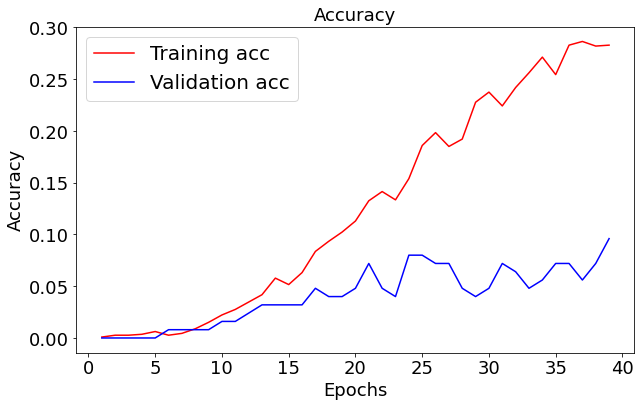

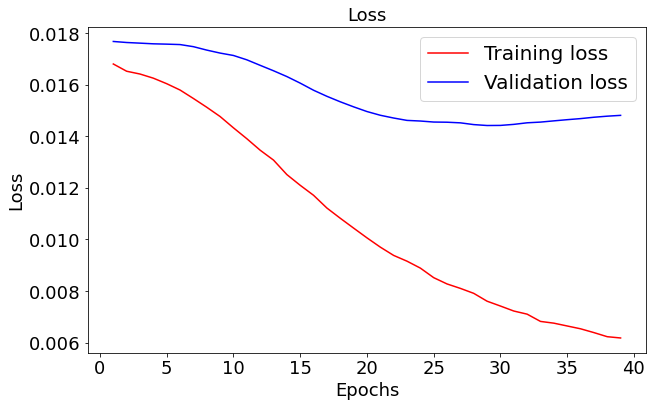

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(epochs, acc, 'r', label='Training acc')
ax.plot(epochs, val_acc, 'b', label='Validation acc')
ax.set_title('Accuracy', fontsize=18)
ax.set_xlabel(r'Epochs', fontsize=18)
ax.set_ylabel(r'Accuracy', fontsize=18)
ax.tick_params(labelsize=18)
ax.legend(fontsize=20)

plt.show()

figL, axL = plt.subplots(1,1, figsize=(10,6))

axL.plot(epochs, loss, 'r', label='Training loss')
axL.plot(epochs, val_loss, 'b', label='Validation loss')
axL.set_title('Loss', fontsize=18)
axL.set_xlabel(r'Epochs', fontsize=18)
axL.set_ylabel(r'Loss', fontsize=18)
axL.tick_params(labelsize=18)
axL.legend(fontsize=20)

plt.show()

# Model Evaluation with Information Retrieval Metrics

In [20]:
from src.metric_utils import MAP_score
from src.metric_utils import Recall_score

In [21]:
#Get probabilities for each citation
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [22]:
train_MAP, test_MAP = MAP_score(Y_train, Y_test, train_predictions, test_predictions, top_k=5)

print("Training MAP Score: ", train_MAP)
print("Test MAP Score: ", test_MAP)

Training MAP Score:  0.5313767793594305
Test MAP Score:  0.10892408245349422


In [23]:
train_recall, test_recall = Recall_score(Y_train, Y_test, train_predictions, test_predictions, top_k=10)

print("Training Recall Score @10:", train_recall)
print("Test Recall Score @10:", test_recall)

Training Recall Score @10: 0.9856936496446127
Test Recall Score @10: 0.2978778585446139


In [24]:
train_recall, test_recall = Recall_score(Y_train, Y_test, train_predictions, test_predictions, top_k=20)

print("Training Recall Score @20:", train_recall)
print("Test Recall Score @20:", test_recall)

Training Recall Score @20: 0.9969361735042339
Test Recall Score @20: 0.38533091874853925


In [25]:
train_recall, test_recall = Recall_score(Y_train, Y_test, train_predictions, test_predictions, top_k=50)

print("Training Recall Score @50:", train_recall)
print("Test Recall Score @50:", test_recall)

Training Recall Score @50: 0.9995255041518387
Test Recall Score @50: 0.5153385120779318


In [26]:
train_recall, test_recall = Recall_score(Y_train, Y_test, train_predictions, test_predictions, top_k=100)

print("Training Recall Score @100:", train_recall)
print("Test Recall Score @100:", test_recall)

Training Recall Score @100: 1.0
Test Recall Score @100: 0.6029755984706744
